# Web Scraping for Indeed.com and Predicting Salaries

### Overview

When searching job postings there salary info is frequently left blank. The purpose of this project is to create a way of determining a way to estimate what that salary should be. In order to narrow the scope of this project and keep to relevant to me, I am focused on Data related jobs only, although the methodology could apply to most jobs, assuming there are enough positions advertised to generate a large enough data set.

**Goals:**
   - create a data set containing a reasonably large ammount of relevant job postings
   - determine the industry factors that are most important in predicting the salary amounts for these data.
   - create a model to predict comparative salary.

#### Beginning to scrape and create a data set.

Below is the process of scraping & investigating pages from [indeed.com](www.indeed.com). I have used BeautifulSoup to pull the web page and then explored the HTML for info I need.

In [1]:
URL = "https://uk.indeed.com/jobs?q=data+scientist&l=London%2C+Greater+London"

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve
from IPython.display import display, HTML 

In [3]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
result = soup.find_all('div',attrs={'class':'result'})

In [107]:
result2 = soup.find_all('div',attrs={'class':'mosaic-zone'})

In [109]:
len(result2)

11

In [119]:
result2[1]

<div class="mosaic-zone" id="mosaic-zone-jobcards"><div class="mosaic mosaic-provider-jobcards" id="mosaic-provider-jobcards"><span aria-live="assertive" class="visually-hidden"></span><a class="tapItem fs-unmask result job_aa457aa85a556fb0 sponsoredJob resultWithShelf sponTapItem desktop" data-ci="380415765" data-empn="7636144005644834" data-hide-spinner="true" data-hiring-event="false" data-jk="aa457aa85a556fb0" data-mobtk="1fpn099mdr7tp802" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0AraZfUMCdnJNjJsWHy6D3Ra_0D6GRfEkfGXZiKyoRK-UgTwcBoOltzaU3gOETeNoNinhkPnkH3TGlJpHcLusrguHQzHYiN2xq89s1SyPJCYEaoacrIcClyZ_BwFFHMBMx884gGjwndyavtzZzhi26kl__b4yufs_iW51EA-uCu7kSfv8p0S5anMQCSCkJxglNoPQWXYogx-DaPVbKupMmwUiP_nl0DAOyGfcdDsB9aOTC4rxRUN_V0Gqy7BgpUkskXpdmPhXoJgPczwxNwWUlsIdom-LBeNDKk6P4SfDBeDiip_5txxERe7LC-8zdovMV03ocL8riKTfZekGatfKnvxtK-lqH15QXOLAp25Rji9R90Pf85GmlPP1GN8ipz3BTNcXBb6B6ueceD-uEK2on1g6E4BSST5iq6GM5nvj0TGRr9JdfafR4l492Xz6dmQb5Y1r4mplht6nyxP9MKyV9pFxeX2nq9oUgEFK-Q3iEvmO-YML49cbD2Rdhx1UCPU6

In [122]:
result2[1].find_all('div',attrs={'class':'mosaic mosaic-provider-jobcards'})

[<div class="mosaic mosaic-provider-jobcards" id="mosaic-provider-jobcards"><span aria-live="assertive" class="visually-hidden"></span><a class="tapItem fs-unmask result job_aa457aa85a556fb0 sponsoredJob resultWithShelf sponTapItem desktop" data-ci="380415765" data-empn="7636144005644834" data-hide-spinner="true" data-hiring-event="false" data-jk="aa457aa85a556fb0" data-mobtk="1fpn099mdr7tp802" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0AraZfUMCdnJNjJsWHy6D3Ra_0D6GRfEkfGXZiKyoRK-UgTwcBoOltzaU3gOETeNoNinhkPnkH3TGlJpHcLusrguHQzHYiN2xq89s1SyPJCYEaoacrIcClyZ_BwFFHMBMx884gGjwndyavtzZzhi26kl__b4yufs_iW51EA-uCu7kSfv8p0S5anMQCSCkJxglNoPQWXYogx-DaPVbKupMmwUiP_nl0DAOyGfcdDsB9aOTC4rxRUN_V0Gqy7BgpUkskXpdmPhXoJgPczwxNwWUlsIdom-LBeNDKk6P4SfDBeDiip_5txxERe7LC-8zdovMV03ocL8riKTfZekGatfKnvxtK-lqH15QXOLAp25Rji9R90Pf85GmlPP1GN8ipz3BTNcXBb6B6ueceD-uEK2on1g6E4BSST5iq6GM5nvj0TGRr9JdfafR4l492Xz6dmQb5Y1r4mplht6nyxP9MKyV9pFxeX2nq9oUgEFK-Q3iEvmO-YML49cbD2Rdhx1UCPU6HITsbz-NIwRtj2M_t18rtxdHfW6e9jex8=&amp;p=0&amp;fvj

In [7]:
print(soup.get_text())




































Data Scientist Jobs in London | Indeed.com














Skip to Job Postings, Search



Find jobsCompany reviewsSalary guideUpload your CVSign inSign inEmployers / Post JobStart of main content


:

WhatWhereFind jobsAdvanced Job SearchRemoteRemote (203)Temporarily remote (COVID-19) (46)Date postedLast 24 hoursLast 3 daysLast 7 daysLast 14 daysSalary estimate£45,000+ (1256)£55,000+ (969)£60,000+ (784)£65,000+ (619)£80,000+ (267)within 25 milesExact location onlywithin 5 mileswithin 10 mileswithin 15 mileswithin 25 mileswithin 50 mileswithin 100 milesJob typeFull-time (655)Permanent (492)Contract (61)Internship (27)Part-time (22)Temporary (7)Apprenticeship (3)LocationLondon (1388)Brentford (19)England (15)Slough (10)CompanyHarnham (154)EY (38)Deloitte (35)PwC (30)Facebook App (25)Metrica Recruitment (23)GSK (22)Capgemini Invent (19)Expedia Group (16)Amazon EU SARL (UK Branch) (13)TikTok (13)Deliveroo (13)AWS EMEA SARL (UK Branch) (12)IQVIA (12)JPMorga

In [27]:
soup.find_all('div', class_="job_seen_beacon")[0]

<div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple"><span title="Jr. Machine Learning Implementation Engineers">Jr. Machine Learning Implementation Engineers</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName">Information Tech Consultants</span><div class="companyLocation">London</div></pre></div><div class="heading6 tapItem-gutter metadataContainer"><div class="metadata salary-snippet-container"><div aria-label="From £30,596 a year" class="salary-snippet"><span>From £30,596 a year</span></div></div></div><div class="heading6 error-text tapItem-gutter"></div></td></tr></tbody></table><table class="jobCardShelfContainer" role="presentation"><tbody><tr class="jobCardShelf"><td class="shelfItem indeedApply"><span class="iaIcon"

In [28]:
soup.find_all('table', class_="jobCard_mainContent")[0]

<table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple"><span title="Jr. Machine Learning Implementation Engineers">Jr. Machine Learning Implementation Engineers</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName">Information Tech Consultants</span><div class="companyLocation">London</div></pre></div><div class="heading6 tapItem-gutter metadataContainer"><div class="metadata salary-snippet-container"><div aria-label="From £30,596 a year" class="salary-snippet"><span>From £30,596 a year</span></div></div></div><div class="heading6 error-text tapItem-gutter"></div></td></tr></tbody></table>

In [64]:
div_class = soup.find_all('a', class_=True)
print(len(div_class))
[d['class'] for d in div_class[70:]][0]

116


['tapItem',
 'fs-unmask',
 'result',
 'job_a766970992ab5675',
 'resultWithShelf',
 'sponTapItem',
 'desktop']

In [186]:
job_postings

[(67,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_aa457aa85a556fb0',
   'sponsoredJob',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (68,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_81596e087bc722e1',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (69,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_80ba1147518747d1',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (70,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_a766970992ab5675',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (71,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_4b91fb225034dbcd',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (74,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_8411751818612285',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (77,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_14a3bb31248f543a',
   'resultWithShelf',
   'sponTapItem',
   'desktop']),
 (80,
  ['tapItem',
   'fs-unmask',
   'result',
   'job_

In [187]:
job_postings = []
for j,i in enumerate([d['class'] for d in div_class]):
#    print(i)
    if 'tapItem' in i:
        job_postings.append((j))

In [208]:
job_postings = []
for j,i in enumerate([d['class'] for d in div_class]):
#    print(i)
    if 'tapItem' in i:
        job_postings.append((div_class[j]))

In [197]:
job_postings[3]

70

In [206]:
div_class[job_postings[5]].text.strip()

'Data ScientistFreedom from Torture3.8London£39,120 a year\nYou will have a deep understanding of data and analytics, preferably in a health or social science context.\nHours: 28 hours per week.\nPosted30+ days ago·More...View all Freedom from Torture jobs - London jobsSalary Search: Data Scientist salaries in LondonSee popular questions & answers about Freedom from Torture'

In [224]:
job_postings[1].prettify()

'<a class="tapItem fs-unmask result job_81596e087bc722e1 resultWithShelf sponTapItem desktop" data-hide-spinner="true" data-hiring-event="false" data-jk="81596e087bc722e1" data-mobtk="1fpn099mdr7tp802" href="/rc/clk?jk=81596e087bc722e1&amp;fccid=97de08cc0d912589&amp;vjs=3" id="job_81596e087bc722e1" rel="nofollow" target="_blank">\n <div class="slider_container">\n  <div class="slider_list">\n   <div class="slider_item">\n    <div class="job_seen_beacon">\n     <table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation">\n      <tbody>\n       <tr>\n        <td class="resultContent">\n         <div class="heading4 color-text-primary singleLineTitle tapItem-gutter">\n          <h2 class="jobTitle jobTitle-color-purple jobTitle-newJob">\n           <div class="new topLeft holisticNewBlue desktop">\n            <span class="label">\n             new\n            </span>\n           </div>\n           <span title="Data Scientist">\n            Data Scientist\n    

In [264]:
for i in job_postings[1]:
    print(i)
    print('-------------------------')

<div class="slider_container"><div class="slider_list"><div class="slider_item"><div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple jobTitle-newJob"><div class="new topLeft holisticNewBlue desktop"><span class="label">new</span></div><span title="Data Scientist">Data Scientist</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName">Fable Data</span><div class="companyLocation">London<!-- --> <!-- -->SE1 0AT</div></pre></div><div class="heading6 tapItem-gutter metadataContainer"><div class="metadata salary-snippet-container"><div aria-label="£50,000 to £60,000 a year" class="salary-snippet"><span>£50,000 - £60,000 a year</span></div></div></div><div class="heading6 error-text tapItem-gutter"></div></td></tr></tbody></table><table 

In [303]:
job_postings[1]['class']

['tapItem',
 'fs-unmask',
 'result',
 'job_81596e087bc722e1',
 'resultWithShelf',
 'sponTapItem',
 'desktop']

In [306]:
job_postings[1].find_all('span', title=True)[0].text.strip()

'Data Scientist'

In [ ]:
job_postings[1].find_all('span')

In [312]:
job_postings[1].find_all('span', class_="companyName")[0].text.strip()

'Fable Data'

In [ ]:
div_class[job_postings[5]].find_all('div', class_="salary-snippet")[0].text.strip()

In [214]:
div_class[job_postings[0]].find_all('h2')[0].text.strip()

TypeError: list indices must be integers or slices, not Tag

In [181]:
div_class[job_postings[0][0]]['data-jk']

'aa457aa85a556fb0'

In [225]:
job_postings[0]['data-jk']

'aa457aa85a556fb0'

In [183]:
div_class[job_postings[0][0]].find_all('div', class_="companyLocation")[0].text.strip()

'London'

In [ ]:
def extract_salary_from_result(result):
    salaries = []
    for i in result:
        try:
            salaries.append(i.find('span',attrs={'class':"salaryText"}).text.strip())
        except:
            salaries.append(np.nan)
    return salaries

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_salary_from_result(result))
print(len(extract_salary_from_result(result)))

In [164]:
for i in div_class[job_postings[0][0]]:
    print(i)
    print('(-----------------------------------------)')

<div class="slider_container"><div class="slider_list"><div class="slider_item"><div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple"><span title="Jr. Machine Learning Implementation Engineers">Jr. Machine Learning Implementation Engineers</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName">Information Tech Consultants</span><div class="companyLocation">London</div></pre></div><div class="heading6 tapItem-gutter metadataContainer"><div class="metadata salary-snippet-container"><div aria-label="From £30,596 a year" class="salary-snippet"><span>From £30,596 a year</span></div></div></div><div class="heading6 error-text tapItem-gutter"></div></td></tr></tbody></table><table class="jobCardShelfContainer" role="presentation"><tbody

In [86]:
def extract_salary_from_result(result):
    salaries = []
    for i in result:
        try:
            salaries.append(i.find('span',attrs={'class':"salaryText"}).text.strip())
        except:
            salaries.append(np.nan)
    return salaries

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_salary_from_result(result))
print(len(extract_salary_from_result(result)))

[]
0


Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Writing functions to extract location, company, job, salary and the URL for the full job description/info.

Having pulled the HTML pages, I have written functions below to help extract the information needed. I've tested the functions on the one instance above before integrating into a continuous search.


In [5]:
def extract_salary_from_result(result):
    salaries = []
    for i in result:
        try:
            salaries.append(i.find('span',attrs={'class':"salaryText"}).text.strip())
        except:
            salaries.append(np.nan)
    return salaries

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_salary_from_result(result))
print(len(extract_salary_from_result(result)))

['£50,000 - £57,000 a year', nan, '£50,000 - £60,000 a year', nan, nan, nan, '£50,000 - £110,000 a year', nan, '£50,000 - £70,000 a year', nan, nan, nan, nan, '£56,480 - £80,764 a year', '£46,332 - £51,480 a year']
15


In [6]:
def extract_jobtitle_from_result(result):
    jobtitles = []
    for i in result:
        try:
            jobtitles.append(i.find('a',attrs={'class':"jobtitle turnstileLink"}).text.strip())
        except:
            jobtitles.append(np.nan)
    return jobtitles

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_jobtitle_from_result(result))
print(len(extract_jobtitle_from_result(result)))

['Data Scientist - Machine Learning', 'Data Scientist - Fusion', 'Data Scientist', 'Junior Data Scientist', 'Data Scientist (Portfolio)', 'Junior Data Scientist', 'Data Scientist', 'Junior Data Scientist', 'Product Data Scientist', 'Junior Data Scientist', 'Graduate Technology Forensic Data Analytics London 2021', 'Data Scientist', 'Graduate Data Scientist', 'Lead Data Scientist', 'Data Scientist']
15


In [7]:
def extract_company_from_result(result):
    companies = []
    for i in result:
        try:
            companies.append(i.find('span',attrs={'class':"company"}).text.strip())
        except:
            companies.append(np.nan)
    return companies

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_company_from_result(result))
print(len(extract_company_from_result(result)))

['Cabot Financial', 'Mindshare', 'Transport for London', 'EDF Energy Limited', 'Founders Factory', 'Novafutur', 'Scarlet Oak Partners', 'Tripledot Studios', 'Data Idols', 'Brainlabs', 'PwC', 'W2O Group', 'RELX Group', "UK Government - Government Actuary's Department", 'Lloyds Banking Group']
15


In [8]:
def extract_location_from_result(result):
    locations = []
    locations_noPostCode = []
    for i in result:
        try:
            locations.append(i.find('span',attrs={'class':"location"}).text.strip())
        except:
            try:
                locations.append(i.find('div',attrs={'class':"location accessible-contrast-color-location"}).text.strip())
            except:
                locations.append(np.nan)
    #This is to clean up location code and remove any postcodes that might be there
    for x in locations:
        try:
            temp_list = []
            y = x.split()
            for z in y:
                if re.findall(r'\d',z) == []:
                    temp_list.append(z)
            locations_noPostCode.append(' '.join(temp_list))
        except:
            locations_noPostCode.append(x)
    return locations_noPostCode

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_location_from_result(result))
print(len(extract_location_from_result(result)))

['London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London', 'London']
15


In [9]:
def extract_url_from_result(result):
    urls = []
    for i in result:
        try:
            j_id = str((i.find('div',attrs={'class':"recJobLoc"}))).split('id="recJobLoc_')[1].split('"')[0]
            j_url = 'https://uk.indeed.com/viewjob?jk='
            urls.append(j_url+j_id)
        except:
            urls.append(np.nan)
    return urls

#Testing the function on the intial scrape above, making sure all lengths align
print(extract_url_from_result(result))
print(len(extract_url_from_result(result)))

['https://uk.indeed.com/viewjob?jk=4528cc13a9c63e55', 'https://uk.indeed.com/viewjob?jk=a7b19a46674839b0', 'https://uk.indeed.com/viewjob?jk=76530e446c2bc0bd', 'https://uk.indeed.com/viewjob?jk=accfbeb9b29f21a7', 'https://uk.indeed.com/viewjob?jk=c31aba9464e23c85', 'https://uk.indeed.com/viewjob?jk=65cc8df228f482e3', 'https://uk.indeed.com/viewjob?jk=7a7f046635dfdb30', 'https://uk.indeed.com/viewjob?jk=7fe044c528a74866', 'https://uk.indeed.com/viewjob?jk=d0ff236847142219', 'https://uk.indeed.com/viewjob?jk=a16eeca018425b74', 'https://uk.indeed.com/viewjob?jk=146bf744ac8a8da0', 'https://uk.indeed.com/viewjob?jk=59f73c0960b0fc49', 'https://uk.indeed.com/viewjob?jk=143ac1dbd83b88b0', 'https://uk.indeed.com/viewjob?jk=b5ccd26a1f54988f', 'https://uk.indeed.com/viewjob?jk=8346f45147e6c5af']
15


In [10]:
def extract_job_level(job_title):
    low_level = ['intern', 'apprenticeship','studentship','internship','apprentice','assistant']
    low_to_mid = ['junior','jr','graduate']
    high_level = ['principal','head','lead','senior','snr','manager']
    words = job_title.replace('(','').replace(')','').split(' ')
    for word in words:
        if word.lower() in high_level:
            return 'high'
        elif word.lower() in low_to_mid:
            return 'low to mid'
        elif word.lower() in low_level:
            return 'low'
        else:
            pass
    return 'mid'

#### Now I have the functions and the ability to scrape pages displaying 15 postings, I can run through the pages indexed to keep pulling more and more info.

I've created some parameters to iterate through (cities & job titles). This then makes a list of results like the one above and allows me to run the functions on them to extract the info needed. I've done it this way so if in the future I decide there's additional info I could use, I can just extract it at this stage rather than running the full scrape again.

In the scraping function there's also an exception for when BeautifulSoup triggers the captcha page, as well as delays to try and insure this doesn't happen too frequently.


In [11]:
#List of every city in the UK.
cities = ['London',
 'Birmingham',
 'Leeds',
 'Glasgow',
 'Sheffield',
 'Bradford',
 'Edinburgh',
 'Liverpool',
 'Manchester',
 'Bristol',
 'Wakefield',
 'Cardiff',
 'Coventry',
 'Nottingham',
 'Leicester',
 'Sunderland',
 'Belfast',
 'Newcastle+upon+Tyne',
 'Brighton',
 'Hull',
 'Plymouth',
 'Stoke-on-Trent',
 'Wolverhampton',
 'Derby',
 'Swansea',
 'Southampton',
 'Salford',
 'Aberdeen',
 'Westminster',
 'Portsmouth',
 'York',
 'Peterborough',
 'Dundee',
 'Lancaster',
 'Oxford',
 'Newport',
 'Preston',
 'St+Albans',
 'Norwich',
 'Chester',
 'Cambridge',
 'Salisbury',
 'Exeter',
 'Gloucester',
 'Lisburn',
 'Chichester',
 'Winchester',
 'Londonderry',
 'Carlisle',
 'Worcester',
 'Bath',
 'Durham',
 'Lincoln',
 'Hereford',
 'Armagh',
 'Inverness',
 'Stirling',
 'Canterbury',
 'Lichfield',
 'Newry',
 'Ripon',
 'Bangor',
 'Truro',
]

In [12]:
##all job titles. As the scrape is continued these get removed so we don't keep scraping the same listings.
job_titles = ['data+scientist', 'data+analyst', 'data+engineer', 'machine+learning', 'business+intelligence','Quantitative+Analyst','Statistician']

In [ ]:
# results = []
# city_completed = []

In [13]:
# #this is the indeed job scraping code.
# #iterating through all the pottential job titles
# for job_title in job_titles:  
#     #iterating through all the cities
#     for city in tqdm(cities):
#         #preliminary search to check for max results per city to minimise scraping duplicates
#         try:
#             max_results = int(BeautifulSoup(requests.get(f'https://uk.indeed.com/jobs?q={job_title}&l={city}').text,
#                                             'html.parser').find('div',attrs={'id':'searchCountPages'}
#                                             ).text.strip().replace(',','').replace(' jobs','').split('of ')[1])
#         except:
#             max_results = 1
        
#         #start of main scrape
#         for start in range(0, max_results, 15):
#             url_template = f'https://uk.indeed.com/jobs?q={job_title}&l={city}&start={start}&radius=5'
#             time.sleep(5)
#             r = requests.get(url_template)
#             soup = BeautifulSoup(r.text, 'html.parser')
            
#             #if we trigger the captcha page, lets me know and stops the loop.
#             if soup.find('title').text == 'hCaptcha solve page':
#                 print(soup.find('title').text)
#                 break
                
#             #scrapes the entire page and add it to the results list. This means if I decide late I want addition info
#             #from the page I can still extract it.
#             results += (soup.find_all('div',attrs={'class':'result'}))
            
#             #running counter so if my scrape gets stopped I know how far through I've got.
#             city_completed.append((job_title,city,start))
#             pass
        
#         #running counter so I know when I've completed each city.
#         city_completed.append((job_title,city,'completed'))

#### Using the functions above to parse out the 5 fields - location, title, company, salary and URL. Creating a dataframe from the results with those 5 columns. On inspection there were lots of duplicates, so I've removed those. I've also removed any listings where the salary info was in day/hourly to leave only yearly salary.

In [14]:
# df= pd.DataFrame()
# df['location'] = extract_location_from_result(results)
# df['company'] = extract_company_from_result(results)
# df['job_title'] = extract_jobtitle_from_result(results)
# df['salary'] = extract_salary_from_result(results)
# #extracting job level from the title (low,mid,high)
# df['job_level'] = df['job_title'].apply(extract_job_level)
# #extracting the url for the full job posting on the indeed website
# df['job_url'] = extract_url_from_result(results)

In [15]:
final_df = df.copy()

NameError: name 'df' is not defined

In [16]:
#only include rows with salary info that includes "a year", to remove NaN values and day/hourly rates
final_df = final_df[final_df['salary'].str.contains("a year", na=False)]
#dropping duplicates
final_df.drop_duplicates(keep="first", inplace=True)

NameError: name 'final_df' is not defined

#### Here I've created a function to deal with any salarys in a range to take the middle of the values.

In [17]:
def salary_stripper(x):
    #all the jobs are in the UK so all currencies are in £
    try:
        j = x.replace('a year', '').replace('£','').replace(',','')
        return int(j)
    except:
        pass
    #if there salary is as a range, split around the '-' and take the average.
    try:
        h = x.replace('a year', '').replace('£','').replace(',','').split(' - ')
        return  (int(h[0]) + int(h[1]))/2
    except:
        pass

In [ ]:
final_df.salary = final_df.salary.apply(salary_stripper)

In [ ]:
final_df.head()

In [ ]:
#this for loop runs through each job url and pulls the full description from the unique web page for each job.
#without this, I would have only been able to get a couple of lines from the job card.
# counter = 0
# job_descriptions = []
for url in tqdm(final_df.job_url):
    time.sleep(5)
    r=requests.get(url)
    soup=BeautifulSoup(r.text,'html.parser')
    if soup.find('title').text == 'hCaptcha solve page':
        print(soup.find('title').text)
        break    
    try:
        job_descriptions.append((url,soup.find('div', attrs={'class':'jobsearch-jobDescriptionText'}).text))
    except:
        job_descriptions.append((url, np.nan))
    counter+= 1

In [ ]:
jd_df = pd.DataFrame(job_descriptions, columns = ['job_url','job_description'])

In [ ]:
jd_df.head()

In [ ]:
#dropping duplicates
jd_df.drop_duplicates(keep="first", inplace=True)

In [ ]:
completed_df = pd.merge(final_df,jd_df,how='inner', on='job_url')

### After creating a data frame above by using the functions, I've saved it below.

In [ ]:
# #hashed this out as I don't want to accidentaly run it and replace my CSV...
# completed_df.to_csv(r'../project-4/final_job_df.csv', index = False)

### Load in the the data of scraped salaries

In [2]:
job_postings = pd.read_csv(r'../project-4/final_job_df.csv')

In [3]:
job_postings.head()

,location,company,job_title,salary,job_level,job_url,job_description
0,London,Kubrick Group,Machine Learning Engineer - Graduate Programme,32000.0,low to mid,https://uk.indeed.com/viewjob?jk=87cbd66eee908bea,Do you want to work in a role where you could ...
1,London,Cabot Financial,Data Scientist - Machine Learning,53500.0,mid,https://uk.indeed.com/viewjob?jk=492079bc2b53c7b2,"At Cabot, we pride ourselves on being the best..."
2,London,UK Government - Government Actuary's Department,Lead Data Scientist,68622.0,high,https://uk.indeed.com/viewjob?jk=b5ccd26a1f54988f,The key areas that you would be responsible fo...
3,London,Great Ormond Street Hospital NHS Foundation Trust,Data Scientist,48586.5,mid,https://uk.indeed.com/viewjob?jk=451417e31d219229,Thanks to the generous support of Great Ormond...
4,London,Machine Medicine Technologies,Data Scientist,45000.0,mid,https://uk.indeed.com/viewjob?jk=0876b38d3062b0c8,About usMachine Medicine Technologies (MMT) us...


In [4]:
job_postings.shape

(1228, 7)

In [5]:
job_postings.job_url.nunique()

1227

In [6]:
#noticed the number of unique urls doesn't match up with the number of columns, dropping duplicates on the url column.
job_postings.drop_duplicates(subset='job_url',keep="first", inplace=True)

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [7]:
#if job salary is above median I am considering it to be high, everything else is low.
job_postings['is_high'] = job_postings.salary.apply(lambda x: 1 if x > job_postings.salary.median() else 0)

#### Thought experiment: What is the baseline accuracy for this model?

In [29]:
job_postings.is_high.value_counts(normalize=True).max()

0.5052974735126324

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [31]:
#model fitting function for easy modeling.
def model_fitter(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=cv))
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return model, cv_score, training_score, test_score

### The following models use only location as a predictor.

##### When looking at the coefficients, we can see that jobs in London represent the greatest indicator of above average salary. This is to be expected as there is a 'London weighting' were salaries are on average £2000 higher because of the increased cost of living.

In [32]:
X = pd.get_dummies(job_postings[['location','is_high']].copy())
y = X.pop('is_high')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                       columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_train.columns)

#creating an empty list for each model to append scores into
just_location = []

LR = LogisticRegression()
just_location.append(model_fitter(LR, X_train, y_train, X_test, y_test, cv=5))

dtc = DecisionTreeClassifier()
just_location.append(model_fitter(dtc, X_train, y_train, X_test, y_test, cv=5))

BC = BaggingClassifier()
just_location.append(model_fitter(BC, X_train, y_train, X_test, y_test, cv=5))

knn = KNeighborsClassifier(n_neighbors=5)
just_location.append(model_fitter(knn, X_train, y_train, X_test, y_test, cv=5))

LRCV = LogisticRegressionCV(Cs=np.logspace(-4, 4, 10),penalty = 'l1', cv=5, solver='liblinear')
just_location.append(model_fitter(LRCV, X_train, y_train, X_test, y_test, cv=5))

pd.DataFrame(just_location, columns = ['model','cv score','training score','test score'])

,model,cv score,training score,test score
0,LogisticRegression(),0.635046,0.689093,0.691057
1,DecisionTreeClassifier(),0.635046,0.689093,0.691057
2,(DecisionTreeClassifier(random_state=405745811...,0.638113,0.677880,0.662602
3,KNeighborsClassifier(),0.547457,0.658512,0.686992
4,"LogisticRegressionCV(Cs=array([1.00000000e-04,...",0.644230,0.658512,0.695122


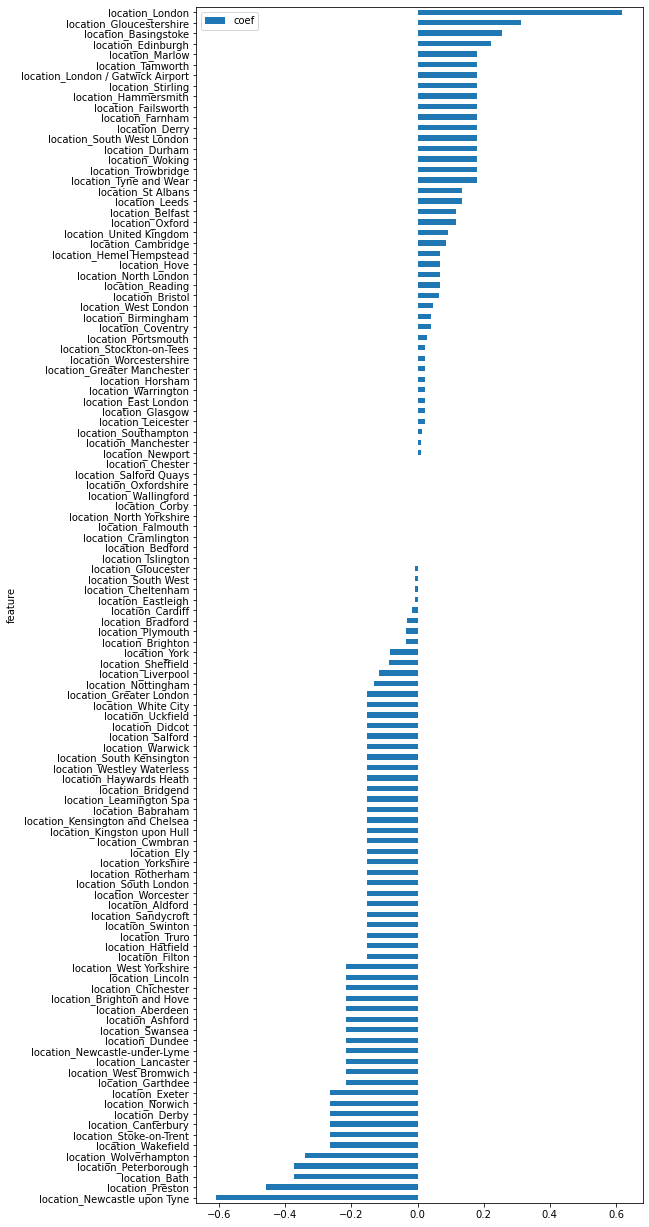

In [33]:
pd.DataFrame(list(zip(X.columns, LR.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 22))
plt.show()

#### The following models use job level as a predictor.
Unsurprisngly, the high level jobs are the most likely to garnish a high salary. Common sense dictates that the next category to follow would be mid level, then low to mid, followed by low. This however is not the case. This could be due to classification errors (Mid encompasses any job title which didn't fall into the other classes). There is a limited number of 'low' level jobs (22) so the sample size is small, and on inspection some of those have been classified as 'low' because they contain 'assistant', but in reality are more senior positions.

In [34]:
X = pd.get_dummies(job_postings[['job_level','is_high']].copy())
y = X.pop('is_high')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                       columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_train.columns)

#creating an empty list for each model to append scores into
just_location = []

LR = LogisticRegression()
just_location.append(model_fitter(LR, X_train, y_train, X_test, y_test, cv=5))

dtc = DecisionTreeClassifier()
just_location.append(model_fitter(dtc, X_train, y_train, X_test, y_test, cv=5))

BC = BaggingClassifier()
just_location.append(model_fitter(BC, X_train, y_train, X_test, y_test, cv=5))

knn = KNeighborsClassifier(n_neighbors=5)
just_location.append(model_fitter(knn, X_train, y_train, X_test, y_test, cv=5))

pd.DataFrame(just_location, columns = ['model','cv score','training score','test score'])

,model,cv score,training score,test score
0,LogisticRegression(),0.629954,0.629969,0.658537
1,DecisionTreeClassifier(),0.629954,0.629969,0.658537
2,(DecisionTreeClassifier(random_state=180264560...,0.629954,0.629969,0.658537
3,KNeighborsClassifier(),0.549461,0.629969,0.658537


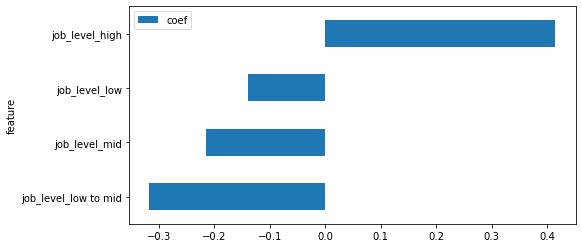

In [35]:
pd.DataFrame(list(zip(X.columns, LR.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 4))
plt.show()

In [36]:
# a look at the jobs classes as low which pay highly
job_postings[(job_postings['job_level']=='low') & (job_postings['is_high']==1)]

,location,company,job_title,salary,job_level,job_url,job_description,is_high
179,Birmingham,Birmingham City University,Assistant Lecturer / Lecturer / Senior Lecture...,45355.5,low,https://uk.indeed.com/viewjob?jk=1e3634c461a0fb64,"Location: Birmingham, City Centre Campus\n\nSa...",1
264,Nottingham,University of Nottingham,Assistant Professor in Data Science/Statistics,43233.5,low,https://uk.indeed.com/viewjob?jk=d635db7e0e561989,"The Digital Economy is reshaping businesses, s...",1
796,Bradford,University of Bradford,Assistant Professor in Artificial Intelligence...,50963.5,low,https://uk.indeed.com/viewjob?jk=29660183eaacce40,With over 50 years of academic excellence and ...,1


#### The following models use location and job level as predictors.
When looking at both the job level and location, these models reaffirm what the previous models showed: London and high level jobs are the strongest indicators of high salary.

In [37]:
X = pd.get_dummies(job_postings[['location','job_level','is_high']].copy())
y = X.pop('is_high')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                       columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_train.columns)

#creating an empty list for each model to append scores into
location_and_level = []

LR = LogisticRegression()
location_and_level.append(model_fitter(LR, X_train, y_train, X_test, y_test, cv=5))

dtc = DecisionTreeClassifier()
location_and_level.append(model_fitter(dtc, X_train, y_train, X_test, y_test, cv=5))

BC = BaggingClassifier()
location_and_level.append(model_fitter(BC, X_train, y_train, X_test, y_test, cv=5))

knn = KNeighborsClassifier(n_neighbors=10)
location_and_level.append(model_fitter(knn, X_train, y_train, X_test, y_test, cv=5))

pd.DataFrame(location_and_level, columns = ['model','cv score','training score','test score'])

,model,cv score,training score,test score
0,LogisticRegression(),0.680928,0.732926,0.739837
1,DecisionTreeClassifier(),0.672765,0.740061,0.735772
2,(DecisionTreeClassifier(random_state=692994577...,0.672786,0.731906,0.739837
3,KNeighborsClassifier(n_neighbors=10),0.632042,0.683996,0.703252


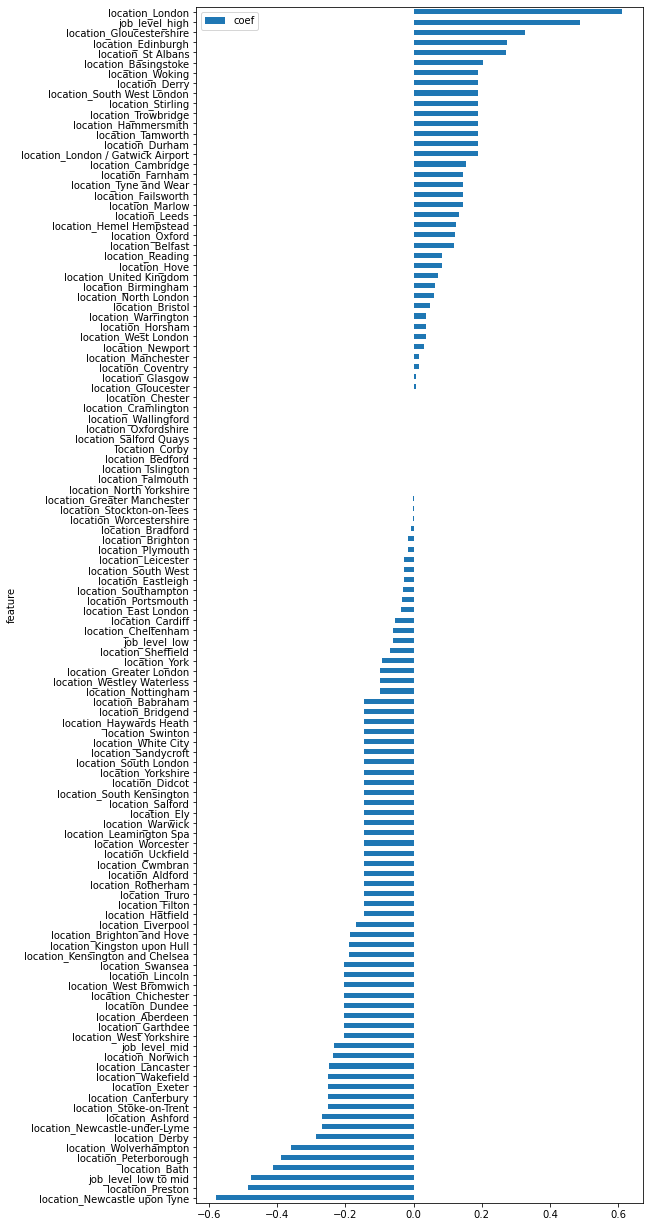

In [38]:
pd.DataFrame(list(zip(X.columns, LR.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 22))
plt.show()

### The following models use location, job level and job title as a predictors.

In [39]:
#out of 1227 job titles, 826 are unique so these models aren't great. When dummified we get
# a lot of additional features and model complexity shoots up.
job_postings.job_title.nunique()

826

In [40]:
X = pd.get_dummies(job_postings[['location','job_level','job_title','is_high']].copy())
y = X.pop('is_high')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                       columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_train.columns)

#creating an empty list for each model to append scores into
location_and_level = []

LR = LogisticRegression()
location_and_level.append(model_fitter(LR, X_train, y_train, X_test, y_test, cv=5))

dtc = DecisionTreeClassifier()
location_and_level.append(model_fitter(dtc, X_train, y_train, X_test, y_test, cv=5))

BC = BaggingClassifier()
location_and_level.append(model_fitter(BC, X_train, y_train, X_test, y_test, cv=5))

pd.DataFrame(location_and_level, columns = ['model','cv score','training score','test score'])

,model,cv score,training score,test score
0,LogisticRegression(),0.701336,0.966361,0.743902
1,DecisionTreeClassifier(),0.720693,0.972477,0.756098
2,(DecisionTreeClassifier(random_state=21572633)...,0.724775,0.944954,0.756098


#### NLP of the job description
Below I have used NLP on the full job description to try and understand if there are key words or phrases which could indicate expected salary.

##### with Count Vectorization...

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [68]:
job_postings.head()

,location,company,job_title,salary,job_level,job_url,job_description,is_high
0,London,Kubrick Group,Machine Learning Engineer - Graduate Programme,32000.0,low to mid,https://uk.indeed.com/viewjob?jk=87cbd66eee908bea,Do you want to work in a role where you could ...,0
1,London,Cabot Financial,Data Scientist - Machine Learning,53500.0,mid,https://uk.indeed.com/viewjob?jk=492079bc2b53c7b2,"At Cabot, we pride ourselves on being the best...",1
2,London,UK Government - Government Actuary's Department,Lead Data Scientist,68622.0,high,https://uk.indeed.com/viewjob?jk=b5ccd26a1f54988f,The key areas that you would be responsible fo...,1
3,London,Great Ormond Street Hospital NHS Foundation Trust,Data Scientist,48586.5,mid,https://uk.indeed.com/viewjob?jk=451417e31d219229,Thanks to the generous support of Great Ormond...,1
4,London,Machine Medicine Technologies,Data Scientist,45000.0,mid,https://uk.indeed.com/viewjob?jk=0876b38d3062b0c8,About usMachine Medicine Technologies (MMT) us...,1


In [69]:
X = (job_postings[['job_description','is_high']].copy())
y = X.pop('is_high')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [70]:
cvec = CountVectorizer(stop_words='english',max_features=2500)
cvec.fit(X_train.job_description)
cvec_mat = cvec.transform(X_train.job_description)
words = cvec.get_feature_names()

In [71]:
#a look at the top 20 most common words, overall & is_high breakdown
a = cvec_mat.sum(axis=0)
cvec_mat_top20 = pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

a = cvec_mat[y_train == 1].sum(axis=0)
cvec_ishigh = pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

a = cvec_mat[y_train == 0].sum(axis=0)
cvec_nothigh = pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

cvec_ishigh.columns = ['is_high = 1']
cvec_nothigh.columns = ['is_high = 0']
cvec_mat_top20.columns = ['top 20 words']

pd.concat([d.reset_index(drop=False) for d in [cvec_mat_top20, cvec_ishigh,cvec_nothigh]], axis=1)

,index,top 20 words,index,is_high = 1,index,is_high = 0
0,data,6627,data,3457,data,3170
1,experience,3094,experience,1619,business,1515
2,business,2756,business,1241,experience,1475
3,work,2274,working,1002,work,1276
4,team,2047,team,998,team,1049
5,working,2030,work,998,working,1028
6,role,1868,role,909,skills,1005
7,skills,1711,learning,845,role,959
8,analysis,1216,science,798,analysis,777
9,learning,1135,skills,706,support,732


In [72]:
X_train = cvec_mat
X_test = cvec.transform(X_test.job_description)

In [73]:
cvec_words = []

lr = LogisticRegression(solver='lbfgs', multi_class='ovr',max_iter=2000)
cvec_words.append(model_fitter(lr, X_train, y_train, X_test, y_test, cv=5))

dtc = DecisionTreeClassifier()
cvec_words.append(model_fitter(dtc, X_train, y_train, X_test, y_test, cv=5))

BC = BaggingClassifier()
cvec_words.append(model_fitter(BC, X_train, y_train, X_test, y_test, cv=5))

knn = KNeighborsClassifier(n_neighbors=10)
cvec_words.append(model_fitter(knn, X_train, y_train, X_test, y_test, cv=5))

pd.DataFrame(cvec_words, columns = ['model','cv score','training score','test score'])

,model,cv score,training score,test score
0,"LogisticRegression(max_iter=2000, multi_class=...",0.781861,1.000000,0.800813
1,DecisionTreeClassifier(),0.707433,1.000000,0.658537
2,(DecisionTreeClassifier(random_state=202158346...,0.757350,0.988787,0.780488
3,KNeighborsClassifier(n_neighbors=10),0.671776,0.769623,0.666667


##### with TF-IDF Vectorization...

In [74]:
X = (job_postings[['job_description','is_high']].copy())
y = X.pop('is_high')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

tvec = TfidfVectorizer(stop_words='english',max_features=2500)
tvec.fit(X_train.job_description)
tvec_mat = tvec.transform(X_train.job_description)
words = tvec.get_feature_names()

#a look at the top 20 most common words, overall & is_high breakdown
a = tvec_mat.sum(axis=0)
tvec_mat_top20 = pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

a = tvec_mat[y_train == 1].sum(axis=0)
tvec_ishigh = pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

a = tvec_mat[y_train == 0].sum(axis=0)
tvec_nothigh = pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

tvec_ishigh.columns = ['is_high = 1']
tvec_nothigh.columns = ['is_high = 0']
tvec_mat_top20.columns = ['top 20 words']

pd.concat([d.reset_index(drop=False) for d in [tvec_mat_top20, tvec_ishigh,tvec_nothigh]], axis=1)

,index,top 20 words,index,is_high = 1,index,is_high = 0
0,data,113.213595,data,62.636875,data,50.576720
1,business,60.384239,experience,32.115388,business,32.054719
2,experience,57.718314,learning,28.911163,experience,25.602926
3,work,41.711449,business,28.329519,work,22.017787
4,team,39.572924,science,26.104219,analyst,21.054760
5,working,39.018228,machine,26.062945,skills,19.554194
6,role,38.418073,scientist,21.661229,team,18.955009
7,learning,36.554909,team,20.617915,analysis,18.852655
8,skills,34.477307,working,20.615179,role,18.703751
9,science,34.120592,role,19.714322,working,18.403050


In [75]:
X_train = tvec_mat
X_test = tvec.transform(X_test.job_description)

tvec_words = []

lr = LogisticRegression(solver='lbfgs', multi_class='ovr',max_iter=2000)
tvec_words.append(model_fitter(lr, X_train, y_train, X_test, y_test, cv=5))

dtc = DecisionTreeClassifier()
tvec_words.append(model_fitter(dtc, X_train, y_train, X_test, y_test, cv=5))

BC = BaggingClassifier()
tvec_words.append(model_fitter(BC, X_train, y_train, X_test, y_test, cv=5))

knn = KNeighborsClassifier(n_neighbors=10)
tvec_words.append(model_fitter(knn, X_train, y_train, X_test, y_test, cv=5))

pd.DataFrame(tvec_words, columns = ['model','cv score','training score','test score'])

,model,cv score,training score,test score
0,"LogisticRegression(max_iter=2000, multi_class=...",0.796151,0.884811,0.792683
1,DecisionTreeClassifier(),0.682953,1.000000,0.723577
2,(DecisionTreeClassifier(random_state=489986751...,0.760458,0.985729,0.747967
3,KNeighborsClassifier(n_neighbors=10),0.731886,0.787971,0.731707


#### Trying to optimise the Logistic Regression TF-IDF model using grid search
This is my best model. It pretty much contains all the info the other models contain (job location, job title) as well as containing all the words from the job description. Of all the models ran using these variables, the Logistic Regression one was the best.

In [76]:
params = {
    'penalty':['l1','l2'],
    'solver':['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'C': np.logspace(-5,5,10)}

lr = LogisticRegression()
lr_gridsearch = GridSearchCV(lr,
                              params,
                              n_jobs=2, #number of cores being used
                              cv=5, 
                              verbose=1,
                              return_train_score=True)

lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 300 tasks      | elapsed:   13.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   26.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']},
             return_train_score=True, verbose=1)

In [77]:
lr_gridsearch.best_score_

0.8042940018647051

In [78]:
lr_gridsearch.best_estimator_

LogisticRegression(C=3.593813663804626)

In [79]:
lr = lr_gridsearch.best_estimator_
model_fitter(lr, X_train, y_train, X_test, y_test, cv=5)

(LogisticRegression(C=3.593813663804626),
 0.8042940018647051,
 0.9531090723751274,
 0.7967479674796748)

In [80]:
predictions = lr.predict(X_test)

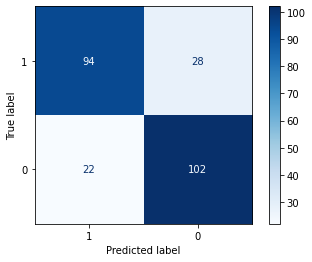

In [81]:
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.show()

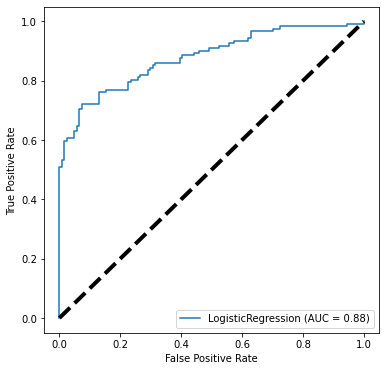

In [82]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(lr, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

In [83]:
from sklearn.metrics import precision_score

#this is the precision score of my best model

precision_score(y_test, predictions)

0.8103448275862069

In [84]:
from sklearn.metrics import recall_score

#this is the recall score of my best model

recall_score(y_test, predictions)

0.7704918032786885

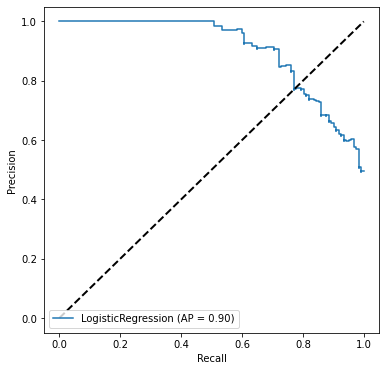

In [85]:
plt.fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(lr, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.show()

In [86]:
#here we can see the probability for each class prediction. At the moment, anything over 0.5 is predicted to the
# respective class.

Y_pp = pd.DataFrame(lr.predict_proba(X_test), 
             columns=['class_0_pp', 'class_1_pp'])
Y_pp

,class_0_pp,class_1_pp
0,0.115412,0.884588
1,0.036371,0.963629
2,0.814167,0.185833
3,0.244964,0.755036
4,0.908148,0.091852
...,...,...
241,0.845658,0.154342
242,0.522848,0.477152
243,0.336880,0.663120
244,0.209963,0.790037


In [87]:
#if we want to reduce the likelihood of predicting a high salary when infact it is a low salary, 
# we can increase the threshold so any predictions the model isn't as sure about predict to be low.
Y_pp['conservative_prediction'] = Y_pp.class_1_pp.apply(lambda x: 1 if x >= 0.7 else 0)
Y_pp

,class_0_pp,class_1_pp,conservative_prediction
0,0.115412,0.884588,1
1,0.036371,0.963629,1
2,0.814167,0.185833,0
3,0.244964,0.755036,1
4,0.908148,0.091852,0
...,...,...,...
241,0.845658,0.154342,0
242,0.522848,0.477152,0
243,0.336880,0.663120,0
244,0.209963,0.790037,1


### Executive summary written for a non-technical audience.
   

The aim of this report is to search Data Science jobs in the UK  and categorise them into either high paying or low paying, and identify key factors which have the most impact in the process.

Data collection

In order to collect the data we scraped (automated retrieval) the Indeed job search platform. We searched every city in the UK for a range of data related jobs and keywords (data scientist, data analyst, data engineer, machine learning, business intelligence, quantitive analyst, statistician). We retrieved the city, the job title, the salary and the job description.

Data cleaning and feature engineering

Once the data had been retrieved, it was cleaned by filling in any missing values where possible, or removing the data point if that was not possible, this left us with 1227 unique job listings.

To determine what is considered high paying, we took the median of the salaries collected, anything above is considered high paying and anything below low paying.

We also looked dissected the job, looking for key words in order to evaluate the level of the position, low (intern, trainee), low-mid (graduate or junior), mid (unspecified, for example ‘data scientist) or high level (senior, head or lead). 

In order to train our model and then test them on unseen data, the data set was split in two, 80% in the training section, 20% in the test section.

Analysis

We began by looking at the bearing location would have on the salary.  We used location as the sole predictor, and London was shown to be the greatest indicator of higher salary (55% of high salary jobs are in London, and only 39% of total jobs). The next cities likely to secure a higher salary are Gloucestershire, Basingstoke and Edinburgh, but they all lag significantly behind London. At the oppose end of the spectrum jobs in Newcastle were most likely to have a low salary, followed by Preston and Bath.

The next step of the analysis was to examine the job level (determined from job title). As one would expect, high level jobs are indicative of a high salary. 76% of high level jobs are high salary. Logically, mid level jobs should follow but this isn’t the case. The data collected shows low level jobs are actually more likely to be high pay - I will address this more in the limitations section below. Following low level is mid level, then low to mid level.

The next group of models carried out combined location and job level; they reinforced what the previous models told us; London is the biggest indicator of high pay, followed by a high job level, then Gloucestershire and Edinburgh. Having a job in Newcastle, Preston, or a low to mid level job would significantly increase the chance of low pay.

Our most accurate model came from doing NLP (natural language processing) on the job description. This process breaks down the description into key words, counting each and assigning a weighting based on the value of each word at predicting the salary grade. Using this technique we can predict salary grade with 81% precision. Part of this process involved examining the most valuable words; we did this for all salary grades followed high and low individually. There are a lot of similarities; ‘data’, ‘business’ and ‘experience’ featuring heavily in both sets. Words which featured more predominantly in the high pay grade, but not as much in low pay grade, include ‘science’, ‘machine’, ‘python’, ‘models’ . These are technical words with particular skills attached. The low pay grade jobs have more weighting towards generic words, ‘work’, ‘support’, ‘reporting’, ‘analyst’.

Limitations, risks and recommendations

The main limitation to this report and these models is the high/low salary indicator is based on the median of all the jobs collected. In reality it would be best to compare jobs against similar ones, both in terms of seniority and location; comparing the salary of a  Lead data scientist in London against that of a data science intern in Newcastle has little merit. It would be more beneficial to know if a job has a high salary given it’s high level and in London. Another limitation is the scope of jobs added into this data set; the skills and salary of a Machine Learning engineer and a statistician might be vastly different, yet they are clumped into this dataset together.

When determining job level we used fairly limited criteria, including assessing ‘assistant’ as a low level job - on examination, 3/22 low level jobs were contained ‘assistant’, all of which were in the high salary class.

In order to improve, I recommend adjusting the consideration for high/low salary based on location and job level, and categorising job level more effectively.

Conclusions

Whilst the final model is effective at predicting a high/low salary, the limitations listed above are considerable and real world application is questionable.